In [1]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np 
import pandas as pd
from tqdm import tqdm
import math
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Bidirectional

Using TensorFlow backend.


# Reading the Data

In [2]:
train_df = pd.read_csv("/Users/viralpandey/Downloads/Data/quora-insincere-questions-classification/train.csv")

x_train, x_valid, y_train, y_valid = train_test_split(train_df.question_text, train_df.target, 
                                                  stratify=train.target, 
                                                  random_state=42, 
                                                  test_size=0.1, shuffle=True)

xtrain = x_train.sample(frac = 0.05)
xvalid = x_valid.sample(frac = 0.05)
ytrain = y_train.sample(frac = 0.05)
yvalid = y_valid.sample(frac = 0.05)

token = text.Tokenizer(num_words=None)
max_len = 50

token.fit_on_texts(list(xtrain) + list(xvalid))
xtrain_seq = token.texts_to_sequences(xtrain)
xtrain_pad = sequence.pad_sequences(xtrain_seq, maxlen=max_len)
xvalid_seq = token.texts_to_sequences(xvalid)
xvalid_pad = sequence.pad_sequences(xvalid_seq, maxlen=max_len)
word_index = token.word_index

### Creatingword Embeddings and Building the Model

In [9]:
# create an embedding matrix for the words we have in the dataset
EMBEDDING_FILE = 'glove.840B.300d.txt'

def embeddings(word,*arr): 
    return word, np.asarray(arr, dtype='float32')

embeddings_index = dict(embeddings(*o.split(" ")) for o in open(EMBEDDING_FILE))

embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in tqdm(word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector
        
        
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                     300,
                     weights=[embedding_matrix],
                     input_length=max_len,
                     trainable=False))
model.add(Bidirectional(LSTM(100, return_sequences=True),
                        input_shape=(30, 300)))
model.add(Dense(1, activation="sigmoid"))
model.add(Dropout(0.8))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [10]:
model.fit(epochs=20,steps_per_epoch=1000, batch_size=500, validation_data=(xvalid_pad, yvalid),verbose=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
1000/1000 [==============================] - 114s 114ms/step - loss: 0.1361 - acc: 0.9476 - val_loss: 0.1059 - val_acc: 0.9573
Epoch 2/20
1000/1000 [==============================] - 105s 105ms/step - loss: 0.1189 - acc: 0.9534 - val_loss: 0.0989 - val_acc: 0.9620
Epoch 3/20
1000/1000 [==============================] - 105s 105ms/step - loss: 0.1143 - acc: 0.9545 - val_loss: 0.1006 - val_acc: 0.9607
Epoch 4/20
1000/1000 [==============================] - 104s 104ms/step - loss: 0.1125 - acc: 0.9554 - val_loss: 0.0968 - val_acc: 0.9623
Epoch 5/20
1000/1000 [==============================] - 101s 101ms/step - loss: 0.1100 - acc: 0.9566 - val_loss: 0.0999 - val_acc: 0.9630
Epoch 6/20
1000/1000 [==============================] - 100s 100ms/step - loss: 0.1101 - acc: 0.9570 - val_loss: 0.0997 - val_acc: 0.9583
Epoch 7/20
1000/1000 [==============================] - 100s 100ms/step - loss: 0.1074 - acc: 0.9579 - val_loss: 0.0977 - va

# Inference

In [15]:
predictions = model.predict_proba(xvalid_pad)

threshold:  0
accuracy 0.05733333333333333
classification report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      2828
           1       0.06      1.00      0.11       172

   micro avg       0.06      0.06      0.06      3000
   macro avg       0.03      0.50      0.05      3000
weighted avg       0.00      0.06      0.01      3000

threshold:  0.0001
accuracy 0.06666666666666667
classification report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02      2828
           1       0.06      1.00      0.11       172

   micro avg       0.07      0.07      0.07      3000
   macro avg       0.53      0.50      0.06      3000
weighted avg       0.95      0.07      0.02      3000

threshold:  0.001
accuracy 0.34833333333333333
classification report:
              precision    recall  f1-score   support

           0       1.00      0.31      0.47      2828
           1       0.08      1

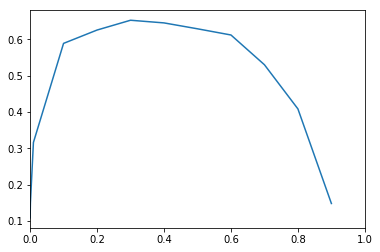

In [33]:
from sklearn.metrics import f1_score,log_loss,confusion_matrix,classification_report,roc_curve,auc, precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, f1_score

threshold = [0, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

f1_scores = []
preds = predictions

for t in threshold:
    y_pred = (np.array(preds) > t).astype(int)
    print('threshold: ', t)
    print('accuracy', accuracy_score(val_y, y_pred))
    print('classification report:')
    print(classification_report(val_y, y_pred))
    print('======================')
    f1_scores.append(f1_score(val_y, y_pred))


plt.plot(threshold, f1_scores)
plt.xlim(0, 1)
plt.show()

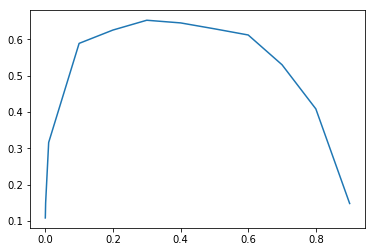

In [20]:
plt.plot(threshold, f1_scores)

In [ ]:
y_te = (np.array(all_preds) > 0.5).astype(np.int)

submit_df = pd.DataFrame({"qid": test_df["qid"], "prediction": y_te})
submit_df.to_csv("submission.csv", index=False)